In [101]:
#configuration
import os
import torch # PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from textwrap import wrap
import seaborn as sns
import matplotlib.pyplot as plt
import re
import whois
import datetime

In [102]:
import pandas as pd
file_path = '/home/roy/Documents/last year/cyber/data.csv'
df = pd.read_csv(file_path)


In [103]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [104]:
df

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [105]:
df['label'].value_counts()

label
good    344821
bad      75643
Name: count, dtype: int64

In [106]:
'''
in the first step we need to do Data Preprocessing //need to do more
'''
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [107]:
df_0 = df[df['label'] == 'bad'].copy()
df_1 = df[df['label'] == 'good'].copy()
df_0= df_0[:50000]
df_1= df_1[:50000]
df = pd.concat([df_0,df_1], ignore_index=True)
df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work
df

/tmp/ipykernel_10705/1502467353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work


,url,label
0,diaryofagameaddict.com,0
1,espdesign.com.au,0
2,iamagameaddict.com,0
3,kalantzis.net,0
4,slightlyoffcenter.net,0
...,...,...
99995,flv.freeones.com/a_babes/Angela_Summers/1405/,1
99996,flv.freeones.com/c_babes/Charley_Chase/138/,1
99997,flv.freeones.com/c_babes/Charley_Chase/930/,1
99998,flwebster.com/,1


In [108]:

# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
def lengthurl(url):
    return len(url)

def countletters(url):
    count = 0
    for char in url:
        if char.isalpha():
            count += 1
    return count
    
def count_digits(url):
    count = 0
    for char in url:
        if char.isdigit():
            count += 1
    return count
    
def domain_age(url):
    try:
        domain_info = whois.whois(url)
        if domain_info.creation_date:
            age = (datetime.datetime.now() - domain_info.creation_date[0]).days
            return age
        else:
            return None
    except:
        return None

def count_letter_digit_letter(url):
    pattern = re.compile(r'[a-zA-Z]\d+[a-zA-Z]')
    occurrences = len(re.findall(pattern, url))
    return occurrences


def count_digit_letter_digit(url):
    pattern = re.compile(r'\d+[a-zA-Z]\d+')
    occurrences = len(re.findall(pattern, url))
    return occurrences

# Function to count delimiters and find the longest word length
def analyze_delimiters_and_longest_word(url):
    delimiters_count = {}
    longest_word_length = 0
    
    # Define delimiters as any non-alphanumeric characters
    delimiters = re.compile(r'[^a-zA-Z0-9]+')
    components = re.split(delimiters, url)
    
    # Iterate over the components
    for component in components:
        # Count delimiters in each component
        delimiters_count[component] = len(re.findall(delimiters, component))
        
        # Find the longest word length
        if len(component) > longest_word_length:
            longest_word_length = len(component)
    
    return delimiters_count, longest_word_length

def check_domain_reputation(domain):
    known_malicious_domains = ['maliciousdomain1.com', 'maliciousdomain2.net']  # need to add more
    if domain in known_malicious_domains:
        return True
    else:
        return False
        

def has_suspicious_keywords(url):
    suspicious_keywords = ['phishing', 'malware', 'scam']  # Add more 
    for keyword in suspicious_keywords:
        if keyword in url:
            return True
    return False
    
def has_subdomains(url):
    if len(url.split('.')) > 2:
        return 1
    else:
        return 0
    
def analyze_whois(domain):
    try:
        domain_info = whois.whois(domain)
        # You would analyze the WHOIS information here and return True/False based on some criteria
        # For simplicity, let's just return True if we get WHOIS information without errors
        return 1
    except:
        return 0
        
df['uses_ip'] = df['url'].apply(uses_ip_address)
df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(countletters)
df['length'] = df['url'].apply(lengthurl)
df['domain_age'] = df['url'].apply(domain_age)
df['letter_digit_letter_count'] = df['url'].apply(count_letter_digit_letter)
df['digit_letter_digit_count'] = df['url'].apply(count_digit_letter_digit)
df['delimiters_count'], df['longest_word_length'] = zip(*df['url'].apply(analyze_delimiters_and_longest_word))
df['domain_reputation'] = df['url'].apply(check_domain_reputation) #
df['has_suspicious_keywords'] = df['url'].apply(has_suspicious_keywords)
df['has_subdomains'] = df['url'].apply(has_subdomains)
df['whois_info'] = df['url'].apply(analyze_whois) #

In [109]:
import re

# Function to count letters, digits, and symbols in each component and generate fixed-length tokens for the domain name

def symbols_count(url):
    count = len(url) - letters_count - digits_count
    return count
    
def analyze_components(url):
    components_analysis = {}
    
    # Define delimiters for splitting the URL into components
    delimiters = re.compile(r'[:/=&?]+')
    components = re.split(delimiters, url)
    
    # Analyze each component
    for component_name, component_value in zip(['domain', 'path', 'argument'], components):
        # Count letters, digits, and symbols in the component
        letters_count = sum(1 for char in component_value if char.isalpha())
        digits_count = sum(1 for char in component_value if char.isdigit())
        symbols_count = len(component_value) - letters_count - digits_count
        
        # Generate fixed-length tokens for the domain name using a three-character length sliding window
        if component_name == 'domain':
            tokens = [component_value[i:i+3] for i in range(len(component_value) - 2)]
        else:
            tokens = None
        
        # Store the analysis results
        components_analysis[component_name] = {
            'letters_count': letters_count,
            'digits_count': digits_count,
            'symbols_count': symbols_count,
            'tokens': tokens
        }
    
    return components_analysis


In [110]:
df

,url,label,uses_ip,count_digits,count_letters,length,domain_age,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,longest_word_length,domain_reputation,has_suspicious_keywords,has_subdomains,whois_info
0,diaryofagameaddict.com,0,False,0,21,22,None,0,0,"{'diaryofagameaddict': 0, 'com': 0}",18,False,False,0,0
1,espdesign.com.au,0,False,0,14,16,None,0,0,"{'espdesign': 0, 'com': 0, 'au': 0}",9,False,False,1,0
2,iamagameaddict.com,0,False,0,17,18,None,0,0,"{'iamagameaddict': 0, 'com': 0}",14,False,False,0,0
3,kalantzis.net,0,False,0,12,13,None,0,0,"{'kalantzis': 0, 'net': 0}",9,False,False,0,0
4,slightlyoffcenter.net,0,False,0,20,21,None,0,0,"{'slightlyoffcenter': 0, 'net': 0}",17,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,flv.freeones.com/a_babes/Angela_Summers/1405/,1,False,4,33,45,None,0,0,"{'flv': 0, 'freeones': 0, 'com': 0, 'a': 0, 'b...",8,False,False,1,0
99996,flv.freeones.com/c_babes/Charley_Chase/138/,1,False,3,32,43,None,0,0,"{'flv': 0, 'freeones': 0, 'com': 0, 'c': 0, 'b...",8,False,False,1,0
99997,flv.freeones.com/c_babes/Charley_Chase/930/,1,False,3,32,43,None,0,0,"{'flv': 0, 'freeones': 0, 'com': 0, 'c': 0, 'b...",8,False,False,1,0
99998,flwebster.com/,1,False,0,12,14,None,0,0,"{'flwebster': 0, 'com': 0, '': 0}",9,False,False,0,0


Accuracy: 0.6413
Train Loss: 0.6076314034497164
Test Loss: 0.6050708578046924
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.47      0.57     15055
           1       0.60      0.81      0.69     14945

    accuracy                           0.64     30000
   macro avg       0.66      0.64      0.63     30000
weighted avg       0.66      0.64      0.63     30000

Class-wise Metrics:
              precision    recall  f1-score     support
0              0.715260  0.473863  0.570059  15055.0000
1              0.604464  0.809970  0.692288  14945.0000
accuracy       0.641300  0.641300  0.641300      0.6413
macro avg      0.659862  0.641916  0.631173  30000.0000
weighted avg   0.660065  0.641300  0.630949  30000.0000


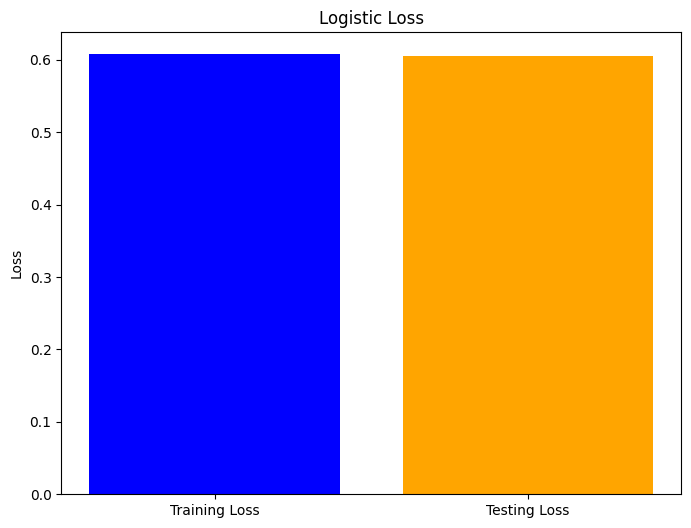

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have already extracted features and created the DataFrame 'df'

# Define features (X) and target variable (y)
X = df[['uses_ip', 'count_letters', 'length', 'count_digits', 
        'letter_digit_letter_count', 'digit_letter_digit_count', 
        'longest_word_length', 'domain_reputation', 
        'has_suspicious_keywords', 'has_subdomains']]
y = df['label']  # Assuming you have defined 'is_malicious' correctly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the imputer on the feature matrix X
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the Logistic Regression classifier
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate logistic loss for training and testing sets
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))
test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Parse the classification report to get individual class metrics
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Class-wise Metrics:")
print(class_report_df)

# Plotting the Loss
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Testing Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()
